<a href="https://colab.research.google.com/github/masterford/ExploratoryDataAnalysis/blob/master/545_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#this cell holds the import statements
import pandas as pd
# Sqlite is a simplistic database
import sqlite3

import matplotlib.pyplot as plt

In [0]:
#load data into colab
url_list = [] 
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/financial_inclusion_africa_Train_v2.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/financial_inclusion_africa_Test_v2.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/VariableDefinitions.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/VariableDefinitions.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/training.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/test.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/3rd_ppp_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/atm_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/banks_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/bus_stands_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/microfinance_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/mobilemoney_agents_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/pos_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/post_office_for_upload_win.csv")
url_list.append("https://raw.githubusercontent.com/masterford/ExploratoryDataAnalysis/master/data/momo_financial_incl_tanzania/FSDT_FinAccessMapping/sacco_for_upload_win.csv")





For the Exploratory section. I'm taking a deep dive into geo spatial data for Tanzania's financial services industry. The main dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey.
The following dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT.


In [42]:
#Exploratory Dataframes

#financial access points in Tanzania
tanzania_map_3rd_df = pd.read_csv(url_list[6], encoding = "ISO-8859-1")
tanzania_map_atm_df = pd.read_csv(url_list[7], encoding = "ISO-8859-1")
tanzania_map_banks_df = pd.read_csv(url_list[8], encoding = "ISO-8859-1")
tanzania_map_busStands_df = pd.read_csv(url_list[9], encoding = "ISO-8859-1")
tanzania_map_microfinance_df = pd.read_csv(url_list[10], encoding = "ISO-8859-1")
tanzania_map_momo_agents_df = pd.read_csv(url_list[11], encoding = "ISO-8859-1")
tanzania_map_post_office_df = pd.read_csv(url_list[13], encoding = "ISO-8859-1")

#tanzania_map_3rd_df.head(4)
#anzania_map_atm_df.head(4)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,32,33,42,74) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data Cleaning.


The next step is to clean the data by removing columns we don't need as well as erroneous values 

In [0]:
#This cell should only be run once
tanzania_map_post_office_df = tanzania_map_post_office_df.drop(columns=['post_office_yr_started', 'services_EMS_courier', 'services_philatel'])
tanzania_map_atm_df = tanzania_map_atm_df.drop(columns=['other_services', 'umoja_nmb'])
tanzania_map_busStands_df = tanzania_map_busStands_df.drop(columns=['destination_Arusha', 'destination_Manyara', 'destination_Singida', 'destination_Pwani', 'destination_Mororgoro', 'destination_Iringa', 'destination_Ruvuma', 'destination_Mbeya', 'destination_Rukwa', 'destination_Tanga', 'destination_Kilimanjaro', 
                                        'destination_Tabora', 'destination_Kigoma', 'destination_Dodoma', 'destination_Mwanza', 'destination_Kagera', 'destination_Shiyanga', 'other_services', 'other_services_details'])
tanzania_map_momo_agents_df = tanzania_map_momo_agents_df.drop(columns=['deposits_tigo_pesa', 'withdrawls_tigo_pesa', 'agent_numbers_tigo_pesa', 'tigo_pesa_agent_number1', 'agent_numbers_airtel_cash', 'airtel_cash_agent_number1', 'airtel_cash_agent_number2',
                                                                        'tigo_pesa_agent_number2', 'tigo_pesa_agent_number3', 'tigo_pesa_log_books', 'tigo_pesa_visible_guidance', 'tigo_pesa_visible_guidance_complaints','deposits_airtel_cash', 'withdrawls_airtel_cash',
                                                                        'airtel_cash_agent_number3', 'airtel_cash_log_books'])


In [0]:
#Change Datatypes
tanzania_map_banks_df['yr_started_reformatted'] = tanzania_map_banks_df['yr_started_reformatted'].apply(lambda x : pd.to_datetime(x))
tanzania_map_banks_df['yr_started'] = tanzania_map_banks_df['yr_started'].apply(lambda x : pd.to_datetime(x))

In [59]:
tanzania_map_momo_agents_df.shape

(45429, 96)

In [61]:
tanzania_map_atm_df.head(5)

region      district  ... services_buy_airtime  visa_mastercard
0  Dar es Salaam         Ilala  ...                  NaN             Both
1  Dar es Salaam         Ilala  ...                  NaN             VISA
2  Dar es Salaam     Kinondoni  ...                  NaN             VISA
3  Dar es Salaam     Kinondoni  ...                  NaN       Mastercard
4         Tabora  Tabora Urban  ...                  Yes             Both

[5 rows x 16 columns]

In [62]:
tanzania_map_banks_df.head(5)

region district  ... yr_started  yr_started_reformatted
0  Dar es Salaam   Temeke  ...   16/05/11               2011-5-01
1      Shinyanga   Kahama  ...   12/07/13               2013-7-01
2  Dar es Salaam   Temeke  ...   05/03/98               1998-3-01
3  Dar es Salaam    Ilala  ...   10/06/09               2009-6-01
4  Dar es Salaam    Ilala  ...   18/12/13              2013-12-01

[5 rows x 10 columns]

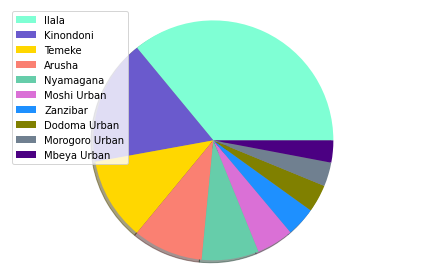

35.98014888337469 16.87344913151365 11.166253101736972 9.429280397022332


In [102]:
#Get bank information in Tanzania by district
#conn = sqlite3.connect('local.db')

#tanzania_map_banks_df.to_sql("tanzania_banks", conn, if_exists="replace", index=False)

#district_bank_count_df = pd.read_sql_query('select district, COUNT(district) AS total  from tanzania_banks GROUP BY district ORDER BY total desc LIMIT 10', conn)

#plot
labels = district_bank_count_df['district'].tolist()
sizes = district_bank_count_df['total'].tolist()
colors = ['aquamarine','slateblue','gold','salmon','mediumaquamarine','orchid','dodgerblue','olive','slategrey','indigo']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#Get statistics
sizes.sort
total = sum(sizes)
llana = (sizes[0]/total) * 100
Kinondoni = (sizes[1]/total) * 100
Temeke = (sizes[2] / total) *100
Arusha = (sizes[3] / total) * 100

print(llana, Kinondoni, Temeke, Arusha)

In [101]:
print(sizes)

[145, 68, 45, 38, 31, 20, 16, 15, 13, 12]


In [0]:
#Show changes in number of banks over time
tanzania_map_banks_df.dtypes

#tanzania_map_banks_df.to_sql("tanzania_banks_date", conn, if_exists="replace", index=False)
last_decade_df = pd.read_sql_query('''SELECT * FROM tanzania_banks WHERE yr_started_reformatted
         >= "2000-01-01" AND yr_started_reformatted <= "2010-12-31" ''', conn)

current_decade_df = pd.read_sql_query('''SELECT * FROM tanzania_banks WHERE yr_started_reformatted
         >= "2010-01-01" ''', conn)

ninetys_decade_df = pd.read_sql_query('''SELECT * FROM tanzania_banks WHERE yr_started_reformatted
                                        <= "2000-01-01" ''', conn)

In [91]:
shape_last = last_decade_df.shape
shape_current = current_decade_df.shape
shape_ninety = ninetys_decade_df.shape
print(shape_current, shape_last, shape_ninety)

(299, 10) (226, 10) (121, 10)


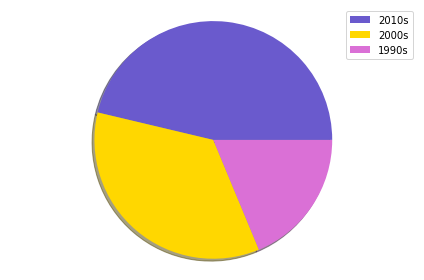

46.28482972136223 34.984520123839005 18.730650154798763


In [103]:
#plot
labels = ['2010s', '2000s', '1990s']
sizes = [shape_current[0], shape_last[0], shape_ninety[0]]
colors = ['slateblue','gold', 'orchid']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#statistics
sizes.sort
total = sum(sizes)
current = (sizes[0]/total) * 100
last = (sizes[1]/total) * 100
ninety = (sizes[2]/total) * 100
print(current, last, ninety)

Using the latitude and longitude columns in the dataset, I can now merge tables with via location as the unique column. To do this, I will first need to convert latitude, longitude into a suitable location object

In [0]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="CIS_545")

def get_zipcode(latlong):
  location = geolocator.reverse(latlong)
  return location.raw['address']['postcode']

def get_address(latlong):
  location = geolocator.reverse(latlong)
  return location.raw['address']

In [109]:
#get_zipcode("40.64749,-73.97237")
get_address("-6.92247,39.27113")

{'city': 'Dar es Salaam',
 'country': 'Tanzania',
 'country_code': 'tz',
 'region': 'Coastal Zone',
 'road': 'T7',
 'suburb': 'Mbagala'}

In [0]:
#Modelling Dataframes
financial_incl_train_df = pd.read_csv(url_list[0])


In [0]:
financial_incl_train_df.head(5)

country  year  ...                  education_level                   job_type
0   Kenya  2018  ...              Secondary education              Self employed
1   Kenya  2018  ...              No formal education       Government Dependent
2   Kenya  2018  ...  Vocational/Specialised training              Self employed
3   Kenya  2018  ...                Primary education  Formally employed Private
4   Kenya  2018  ...                Primary education        Informally employed

[5 rows x 13 columns]